In [5]:
#Stroke_Data_Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [13]:
# Read the Data
df = pd.read_csv("strokedata.csv")

In [17]:
def preprocess(df):
    imputer = SimpleImputer(strategy='mean')     #Handle missing value in BMI
    df['bmi'] = imputer.fit_transform(df[['bmi']])

    # Encode Categorical Variable
    Categorical_cols = df.select_dtypes(include=['object']).columns
    for col in Categorical_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
    return df

In [18]:
#Exploratory Data Analysis
def perform_eda(df):
    print("Basic Info:")
    print(df.info())

    print("\nClass Distribution (stroke vs no-stroke):")
    print(df['stroke'].value_counts())

    plt.figure(figsize=(8,5))
    sns.countplot(x='stroke', data=df)
    plt.title("Stroke Class Distribution")
    plt.show()

    plt.figure(figsize=(10,6))
    sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
    plt.title("Feature Correlation Matrix")
    plt.show()

In [20]:
#  Train Model
def train_model(df):
    X = df.drop('stroke', axis=1)
    y = df['stroke']

    # Feature scaling
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Random Forest Classifier
    model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   int64  
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int64  
 6   work_type          5110 non-null   int64  
 7   Residence_type     5110 non-null   int64  
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   int64  
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 479.2 KB
None

Class Distribution (stroke vs no-stroke):
stroke
0    4861
1     249
Name: count, dtype: int64


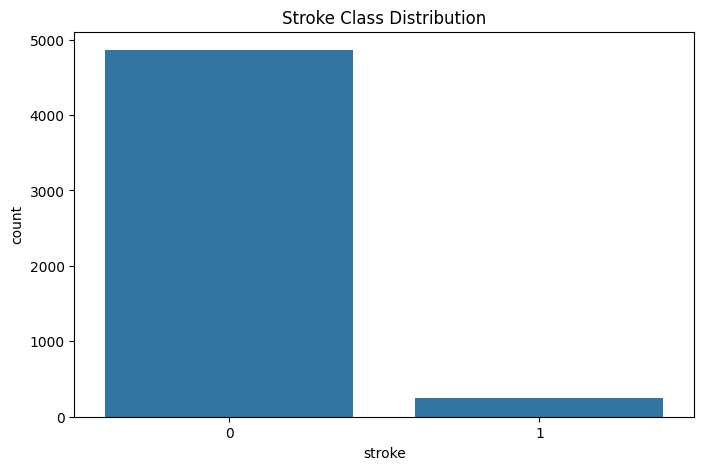

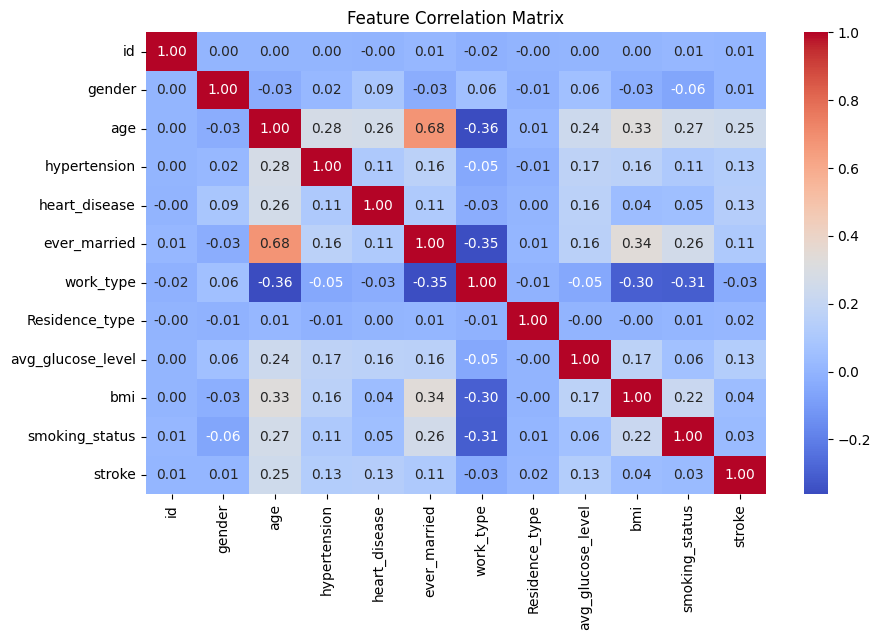


Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

Confusion Matrix:
[[960   0]
 [ 62   0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [27]:
# MAIN
if __name__ == "__main__":
    filepath = "strokedata.csv"  # Replace with your dataset path
    df = pd.read_csv("strokedata.csv")
    df = preprocess(df)
    perform_eda(df)
    train_model(df)